In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.append('/jbk001-data1/git/SuperPnP/')

import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [11]:
outs_dict = torch.load('inference_outs.pth')
outs_dict.keys(), outs_dict['superglue_correspondences'].shape, outs_dict['flownet_correspondences'].shape, outs_dict['matches'].shape, 



(dict_keys(['inputs', 'keypoints', 'superglue_correspondences', 'superglue_scores', 'flownet_correspondences', 'image1_depth', 'image2_depth', 'matches']),
 (386, 4),
 (1055, 4),
 (1441, 4))

In [12]:
cat_images = np.concatenate([ outs_dict['inputs']['image1'],  outs_dict['inputs']['image2']], axis=0)
superglue_correspondences = outs_dict['superglue_correspondences']
matches = outs_dict['matches']

h, w = cat_images.shape[0] / 2, cat_images.shape[1] / 2

superglue_correspondences[:10], h, w, matches[:10]

(array([[485.,   9., 487.,   8.],
        [ 24.,  12.,  16.,   9.],
        [493.,  13., 495.,  11.],
        [772.,  14., 785.,  10.],
        [810.,  14., 820.,  12.],
        [348.,  16., 347.,  12.],
        [525.,  17., 529.,  14.],
        [785.,  17., 798.,  16.],
        [479.,  18., 481.,  16.],
        [500.,  21., 503.,  19.]], dtype=float32),
 3.0,
 128.0,
 array([[485.,   9., 487.,   8.],
        [ 24.,  12.,  16.,   9.],
        [493.,  13., 495.,  11.],
        [772.,  14., 785.,  10.],
        [810.,  14., 820.,  12.],
        [348.,  16., 347.,  12.],
        [525.,  17., 529.,  14.],
        [785.,  17., 798.,  16.],
        [479.,  18., 481.,  16.],
        [500.,  21., 503.,  19.]], dtype=float32))

SuperGlue keypoints and matches

TypeError: Invalid shape (6, 256, 832) for image data

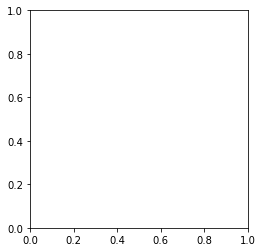

In [13]:
plt.imshow(cat_images, aspect='equal')
num_show = 150

keypoints = outs_dict['keypoints']

count = 0
for keypoint in keypoints[0]:
    if count == num_show:
        break
    plt.plot(keypoint[0], keypoint[1], 'o', color='red')
    count += 1
    
count = 0
for keypoint in keypoints[1]:
    if count == num_show:
        break
    plt.plot(keypoint[0], keypoint[1] + h, 'o', color='green')
    count += 1
    
plt.savefig('keypoint_out.png')

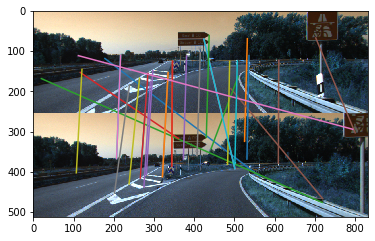

In [6]:
import random
plt.imshow(cat_images, aspect='equal')

for i in range(30):
    idx = random.randint(0, superglue_correspondences.shape[0])
    plt.plot([superglue_correspondences[idx][0], superglue_correspondences[idx][2]], [superglue_correspondences[idx][1], superglue_correspondences[idx][3] + h])

plt.savefig('superglue_sampled_correspondences.png')

TypeError: Invalid shape (6, 256, 832) for image data

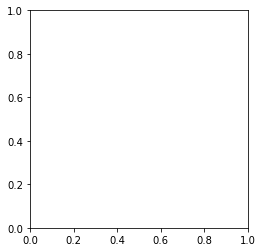

In [14]:
import random
plt.imshow(cat_images, aspect='equal')

for i in range(50):
    idx = random.randint(0, matches.shape[0])
    plt.plot([matches[idx][0], matches[idx][2]], [matches[idx][1], matches[idx][3] + h])

plt.savefig('superglueflow_sampled_correspondence_out.png')